In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from itertools import islice

In [ ]:
df = pd.read_csv('data/cleaned_twitter.csv')
df.head()

,sentimen,Tweet
0,1.0,menitik air mata saya terbayang betapa terseks...
1,1.0,kalau bnda itu jadi lagi saya mals deh ingin m...
2,1.0,complicated betul saya usha dak ptptn
3,1.0,haruskah unfollow semua olshop yang seliweran ...
4,1.0,saya pamit dan jangan cari saya


In [ ]:
# Checking for null values
df.isna().sum()

sentimen      0
Tweet       417
dtype: int64

In [ ]:
# Import Module
from sklearn.impute import SimpleImputer

# Pembuatan Imputation dengan pengganti modus
impute_modes = SimpleImputer(strategy='most_frequent')

df['Tweet'] = impute_modes.fit_transform(df[['Tweet']])

In [ ]:
# Checking for null values
df.isna().sum()

sentimen    0
Tweet       0
dtype: int64

In [ ]:
tweets = df['Tweet']
tweets.head()

0    menitik air mata saya terbayang betapa terseks...
1    kalau bnda itu jadi lagi saya mals deh ingin m...
2                complicated betul saya usha dak ptptn
3    haruskah unfollow semua olshop yang seliweran ...
4                      saya pamit dan jangan cari saya
Name: Tweet, dtype: object

In [ ]:
max_len = 0
max_words = ''
unique_words = set()
for tweet in tweets.str.split():
    if not tweet:
        continue
    tweet_max = max(tweet, key=len)
    unique_words.update(tweet)
    if max_len < len(tweet_max):
        max_len = len(tweet_max)
        max_words = tweet_max

print(f"{max_len=}\n{max_words=}\n{len(unique_words)=}")

max_len=39
max_words='sejukatgasnusantaraatgasnusantarakaltim'
len(unique_words)=13284


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

y = df["sentimen"]
#mengubah y menjadi integer
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)
print(y[0:10])

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenisasi
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tweets)

In [ ]:
word2vec=tokenizer.word_index
V=len(word2vec)
print('Dataset has %s number of independent tokens' %V)

Dataset has 13283 number of independent tokens


In [ ]:
encoded_comments = tokenizer.texts_to_sequences(tweets)
print(encoded_comments[0:10])

[[4717, 495, 263, 1, 4718, 958, 4719, 321, 1888, 3021, 10, 296, 4720, 52, 2292, 3022, 1591, 1889, 1405], [13, 4721, 10, 15, 35, 1, 4722, 205, 65, 4723], [2293, 22, 1, 3023, 2294, 4724], [4725, 4726, 48, 3024, 2, 4727, 12, 686, 8, 36, 4728, 106, 1, 4729, 13, 12, 4730], [1, 3025, 5, 36, 163, 1], [1, 3026, 4731, 185, 31, 353, 14, 3027, 76, 33, 760, 33, 48, 2, 41, 1890], [461, 57, 6, 1, 12, 54, 377], [1891, 4732, 184, 4733, 8, 1, 1406, 17, 1042, 4734], [1, 53, 220, 42, 127, 1, 559, 4735, 16, 1, 442, 1269, 901], [3028, 560, 1, 35, 246, 4736]]


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
def get_sequences(tokenizer, tweets):
    sequences = tokenizer.texts_to_sequences(tweets)
    padded = pad_sequences(sequences, truncating = 'post', padding='post', maxlen=max_len)
    return padded
X = get_sequences(tokenizer, tweets)

In [ ]:
print('Shape of X is ', X.shape)
print('Shape of y is', y.shape)

Shape of X is  (6664, 39)
Shape of y is (6664, 2)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

In [ ]:
print(f'Bentuk X_train = {x_train.shape}',
      f'Bentuk Y_train = {y_train.shape}',
      f'Bentuk X_test = {x_test.shape}',
      f'Bentuk Y_test = {y_test.shape}', sep="\n")

Bentuk X_train = (5331, 39)
Bentuk Y_train = (5331, 2)
Bentuk X_test = (1333, 39)
Bentuk Y_test = (1333, 2)


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

In [ ]:
from tensorflow.keras.layers import Dense, Embedding,LSTM, Dropout, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras import Sequential
model = Sequential([
Embedding(10000,16,input_length=max_len),
GlobalMaxPooling1D(),
Dense(2, activation='sigmoid')
])
model.compile(
     loss='categorical_crossentropy',
     optimizer='adam',
     metrics=['accuracy']
)

NameError: name 'max_len' is not defined

In [ ]:
h = model.fit(
     x_train, y_train,
     validation_data=(x_test, y_test),
     epochs=20,
)

NameError: name 'model' is not defined

In [ ]:
model.save('model/sentimen_tweet.h5')

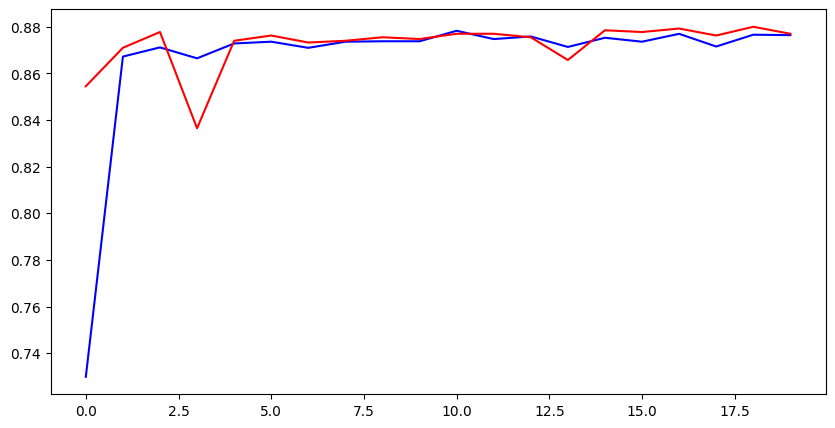

In [ ]:
import matplotlib.pyplot as plt
plt.figure(1, (10,5))
x = range(len(h.history['accuracy']))
plt.plot(x,h.history['accuracy'], c='blue')
plt.plot(x,h.history['val_accuracy'],c='red')
plt.show()